## Computational Physics Homework 2
by Aleena Sibi(s6alsibi) and Kriti Baweja(s6krbawe)

## Questions:


<b>Que2)</b> How does numerical cost of calculating the energy change with system size $\Lambda$?<br>
<b>Ans2)</b> The Cost of evaluating the energy varies as $\Lambda$ as the in the hamiltonian expression we have interaction only between 4 neighbouring spins, so therefore we have a total of 4$\Lambda$ interaction similarly the external magnetic field acts on all the spins so that term goes as $\Lambda$ and therefore the total expense of calculating energy varies as $\Lambda$.

<b>Que3)</b> Assuming you’ve flipped one spin $s_i$, how does the numerical cost of the calculation of
the change in energy $\Delta$S scale with the system size $\lambda$?<br>
<b>Ans3)</b> The change in energy when we flip a spin is evaluated only by calculating the change in interaction with the neighbours(in our model) and evaluating the change in energy of spin when we flip it in prescence of magnetic field. So therefore it doesn't depend on the size of the system rather it depends on dimensionality of our problem as the number of nearest neighbours vary as 2d where d is no. of dimensions of our system for eg its 6 in 3-dimensions.

<b>Que 4)</b>What is the significance of the critical coupling $J_c$ ? <br>
<b>Ans 4)</b>The critical coupling constant determines when the coupling constant overpowers the external temperature, the external temperature tends to randomize the spin and the coupling constant tends to align the spins and therefore helps us to determine at which value of J will we see phase transitions(ferromagnetization).

In [415]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
from tqdm import tqdm
import math as m
import scipy.special as s

In [363]:
N = 5
spins = [[np.random.choice([-1,1]) for i in range(N)] for j in range(N)] 
spin1 = np.copy(spins)

In [364]:
def neigh(i,j):
    
    right=[i,j+1]
    left=[i,j-1]
    up=[i-1,j]
    down=[i+1,j]
    
    if (i==N-1):
        down=[0,j]
        
    if(j==N-1):
        right=[i,0]
        
    a=[right,left,up,down]
    return a
   

In [365]:
T = 1.
def hastings(h,k,l,spins,J=0.75):
    dM = 0
    N = np.shape(spins)[0]
    Neigh=neigh(k,l)
    dE,de = 0,0
    for i in range(4):
        dE += 2*J*spins[k][l]*spins[Neigh[i][0]][Neigh[i][1]] 
    dE += 2*h*spins[k][l]
    
    if (dE < 0 or np.random.uniform(0,1) < np.exp(-dE/T)):
        de = dE
        dM = -2*spins[k][l]
        spins[k][l] *= -1
        
        #print(dM)
    return dM,de

def Eg(spins,h,J):
    hterm, interacn = 0,0
    for i in range(N):
        for j in range(N):
            hterm += -h*spins[i][j]
            Neigh=neigh(i,j)
            for k in range(4):
                interacn += J*spins[Neigh[k][0]][Neigh[k][1]]*spins[i][j]
    return -0.5*interacn + hterm
                            

In [391]:
#T=1.
h=0
Jj = np.linspace(0.25,2,65)
Earr=[]

for l in tqdm(range(len(Jj))):
    Eavg = 0
    spins = np.copy(spin1)
    E = Eg(spins,0,Jj[l])
    
    for k in range(1000):
        for i in range(N):
            for j in range(N):
                x,y=hastings(0,i,j,spins,Jj[l])
                E+=y
        Eavg+=E/N**2
    
    Earr.append(Eavg/1000)  

100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:23<00:00,  2.72it/s]


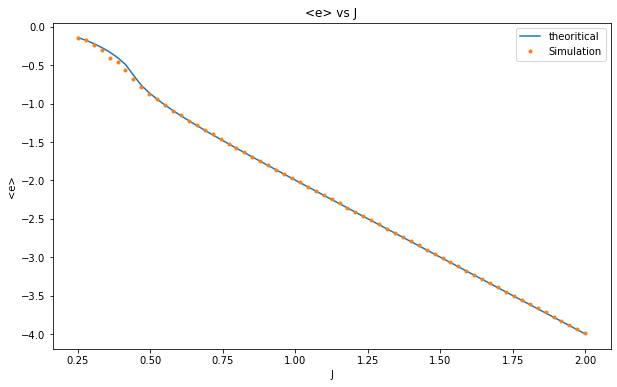

In [416]:

Ecur=-Jj*(1/np.tanh(2*Jj))*(1+(2/np.pi)*(2*(np.tanh(2*Jj))**2-1)*s.ellipk(4*(1/np.cosh(2*Jj))**2*(np.tanh(2*Jj))**2))
plt.figure(figsize=(10,6))
plt.title("<e> vs J")
plt.xlabel("J")
plt.ylabel("<e>")
plt.plot(Jj,Ecur,label="theoritical")
plt.plot(Jj,Earr,'.',label = 'Simulation')
plt.legend()

In [397]:
h=np.linspace(-1,1,100)
M1=np.sum(spin1)
Mavg = 0

Marr = []
for l in tqdm(range(len(h))):
    spins = np.copy(spin1)
    M = M1
    Mavg = 0

    for k in range(5000):
        for i in range(N):
            for j in range(N):
                x,y=hastings(h[l],i,j,spins)
                M+=x
        Mavg += M/N**2
    
    Marr.append(Mavg/5000)    
        


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:31<00:00,  2.71s/it]


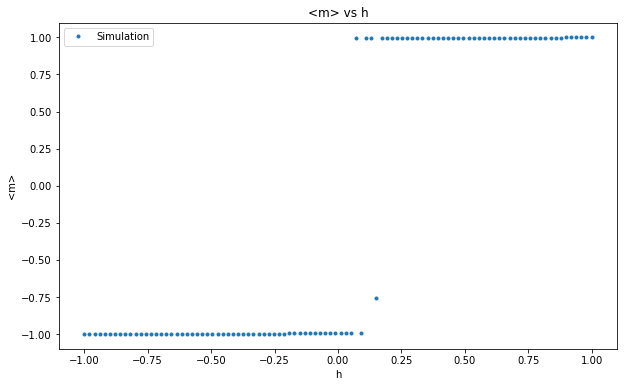

In [398]:
plt.figure(figsize=(10,6))
plt.title("<m> vs h")
plt.xlabel("h")
plt.ylabel("<m>")
plt.plot(h,np.array(Marr),'.',label = 'Simulation')
plt.legend()

In [406]:
T=1.0
Jj1=np.linspace(0.25,1,25)
M1=np.sum(spin1)

Marr1 = []
Marr2=[]
for l in tqdm(range(len(Jj1))):
    spins = np.copy(spin1)
    M = M1
    Mavg1 = 0
    Mavg2=0
    for k in range(5000):
        for i in range(N):
            for j in range(N):
                x,y=hastings(0,i,j,spins,Jj1[l])
                M+=x
        Mavg1 += np.abs(M)/N**2
        Mavg2+=M/N**2
    
    Marr1.append(Mavg1/5000)
    Marr2.append(Mavg2/5000)


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:43<00:00,  1.75s/it]


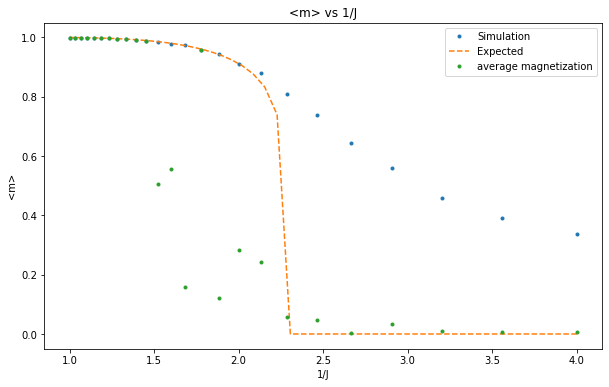

In [407]:
J = np.linspace(0.25,1,50)
fx = np.zeros(len(J))
for i in range(len(J)):
    if(J[i]> 0.5*np.log(1+2**0.5)):
        fx[i] = (1 - 1/(m.sinh(2*J[i]))**4)**0.125

plt.figure(figsize=(10,6))
plt.title("<m> vs 1/J")
plt.xlabel("1/J")
plt.ylabel("magnetization")
plt.plot(1/Jj1,Marr1,'.',label = 'Simulation $<|m|>$')
plt.plot(1/J,fx,'--',label = 'Expected')
plt.plot(1/Jj1,np.abs(np.array(Marr2)),'.',label='average magnetization $<m>$')
plt.legend()

<b>Que 6)</b>  Explain the physical significance of what you find. What would you see
if you instead plotted $<m>$ instead of $<|m|>$?<br>
<b> Ans 6)</b> From the plot we observe phase transitions occour at $J_c$ as all the spins are aligned after crossing this critical value and we see ferromagnetic behaviour. Also, if we keep on increasing N while plotting the $<|m|>$ vs $1/J$ we observe that the simulated curve gets closer and closer to the theoritical curve and also with increasing N the phase transition at $J_c$ becomes sharper and sharper, this can be seen in the simulation . While plotting graph we plot it with $<|m|>$ and not $<m>$ because m can be positive nad negative and while averaging it cancels out and we generally observe no trend and more oftenly the average turns out to be 0 and this is not the case in case of $<|m|>$ and we are able to see how magnetization varies with J.

### Caution : We have used the same variables for plotting the other graphs for different N's as well, so please run  the code in order.

In [423]:
N=10
spins = [[np.random.choice([-1,1]) for i in range(N)] for j in range(N)] 
spin1 = np.copy(spins)
T=1.0
Jj1=np.linspace(0.25,1,25)
M1=np.sum(spin1)

Marr1 = []
Marr2=[]
for l in tqdm(range(len(Jj1))):
    spins = np.copy(spin1)
    M = M1
    Mavg1 = 0
    Mavg2=0
    for k in range(5000):
        for i in range(N):
            for j in range(N):
                x,y=hastings(0,i,j,spins,Jj1[l])
                M+=x
        Mavg1 += np.abs(M)/N**2
        Mavg2+=M/N**2
    
    Marr1.append(Mavg1/5000)
    Marr2.append(Mavg2/5000)


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [03:11<00:00,  7.67s/it]


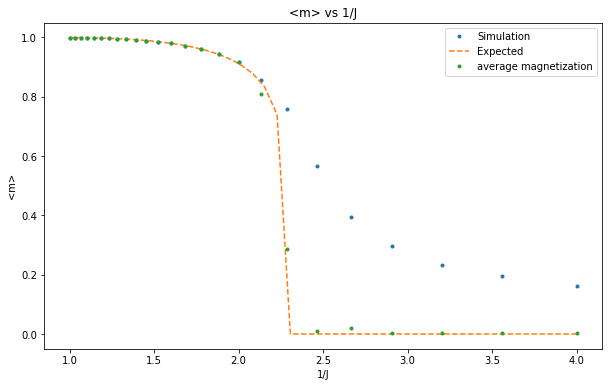

In [424]:
J = np.linspace(0.25,1,50)
fx = np.zeros(len(J))
for i in range(len(J)):
    if(J[i]> 0.5*np.log(1+2**0.5)):
        fx[i] = (1 - 1/(m.sinh(2*J[i]))**4)**0.125

plt.figure(figsize=(10,6))
plt.title("<m> vs 1/J")
plt.xlabel("1/J")
plt.ylabel("Magnetization")
plt.plot(1/Jj1,Marr1,'.',label = 'Simulation $<|m|>$ ')
plt.plot(1/J,fx,'--',label = 'Expected')
plt.plot(1/Jj1,np.abs(np.array(Marr2)),'.',label='average magnetization $<m>$')
plt.legend()

In [425]:
N=15
spins = [[np.random.choice([-1,1]) for i in range(N)] for j in range(N)] 
spin1 = np.copy(spins)
T=1.0
Jj1=np.linspace(0.25,1,25)
M1=np.sum(spin1)

Marr1 = []
Marr2=[]
for l in tqdm(range(len(Jj1))):
    spins = np.copy(spin1)
    M = M1
    Mavg1 = 0
    Mavg2=0
    for k in range(5000):
        for i in range(N):
            for j in range(N):
                x,y=hastings(0,i,j,spins,Jj1[l])
                M+=x
        Mavg1 += np.abs(M)/N**2
        Mavg2+=M/N**2
    
    Marr1.append(Mavg1/5000)
    Marr2.append(Mavg2/5000)


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:48<00:00, 16.33s/it]


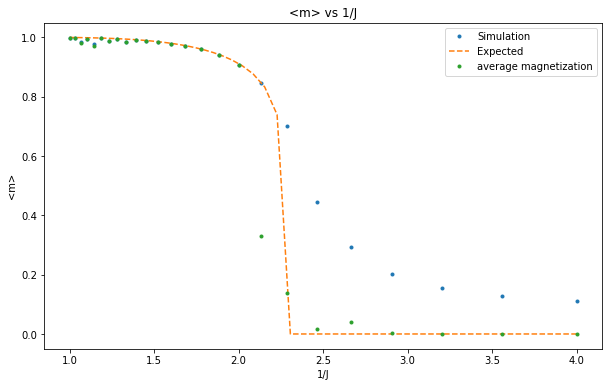

In [426]:
J = np.linspace(0.25,1,50)
fx = np.zeros(len(J))
for i in range(len(J)):
    if(J[i]> 0.5*np.log(1+2**0.5)):
        fx[i] = (1 - 1/(m.sinh(2*J[i]))**4)**0.125

plt.figure(figsize=(10,6))
plt.title("<m> vs 1/J")
plt.xlabel("1/J")
plt.ylabel("Magnetization")
plt.plot(1/Jj1,Marr1,'.',label = 'Simulation $<|m|>$')
plt.plot(1/J,fx,'--',label = 'Expected')
plt.plot(1/Jj1,np.abs(np.array(Marr2)),'.',label='average magnetization $<m>$')
plt.legend()

In [427]:
N1=20
spins = [[np.random.choice([-1,1]) for i in range(N)] for j in range(N)] 
spin1 = np.copy(spins)
T=1.0
Jj1=np.linspace(0.25,1,25)
M1=np.sum(spin1)

Marr1 = []
Marr2=[]
for l in tqdm(range(len(Jj1))):
    spins = np.copy(spin1)
    M = M1
    Mavg1 = 0
    Mavg2=0
    for k in range(5000):
        for i in range(N):
            for j in range(N):
                x,y=hastings(0,i,j,spins,Jj1[l])
                M+=x
        Mavg1 += np.abs(M)/N**2
        Mavg2+=M/N**2
    
    Marr1.append(Mavg1/5000)
    Marr2.append(Mavg2/5000)


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [06:50<00:00, 16.44s/it]


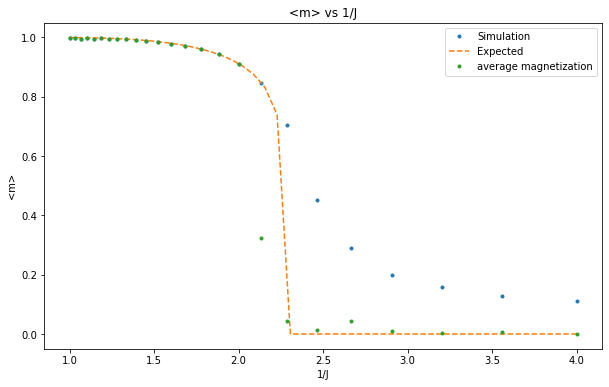

In [428]:
J = np.linspace(0.25,1,50)
fx = np.zeros(len(J))
for i in range(len(J)):
    if(J[i]> 0.5*np.log(1+2**0.5)):
        fx[i] = (1 - 1/(m.sinh(2*J[i]))**4)**0.125

plt.figure(figsize=(10,6))
plt.title("<m> vs 1/J")
plt.xlabel("1/J")
plt.ylabel("Magnetization")
plt.plot(1/Jj1,Marr1,'.',label = 'Simulation $<{|m|}>$')
plt.plot(1/J,fx,'--',label = 'Expected')
plt.plot(1/Jj1,np.abs(np.array(Marr2)),'.',label='average magnetization $<m>$')
plt.legend()

### $<|m|>$ vs 1/J for different N's

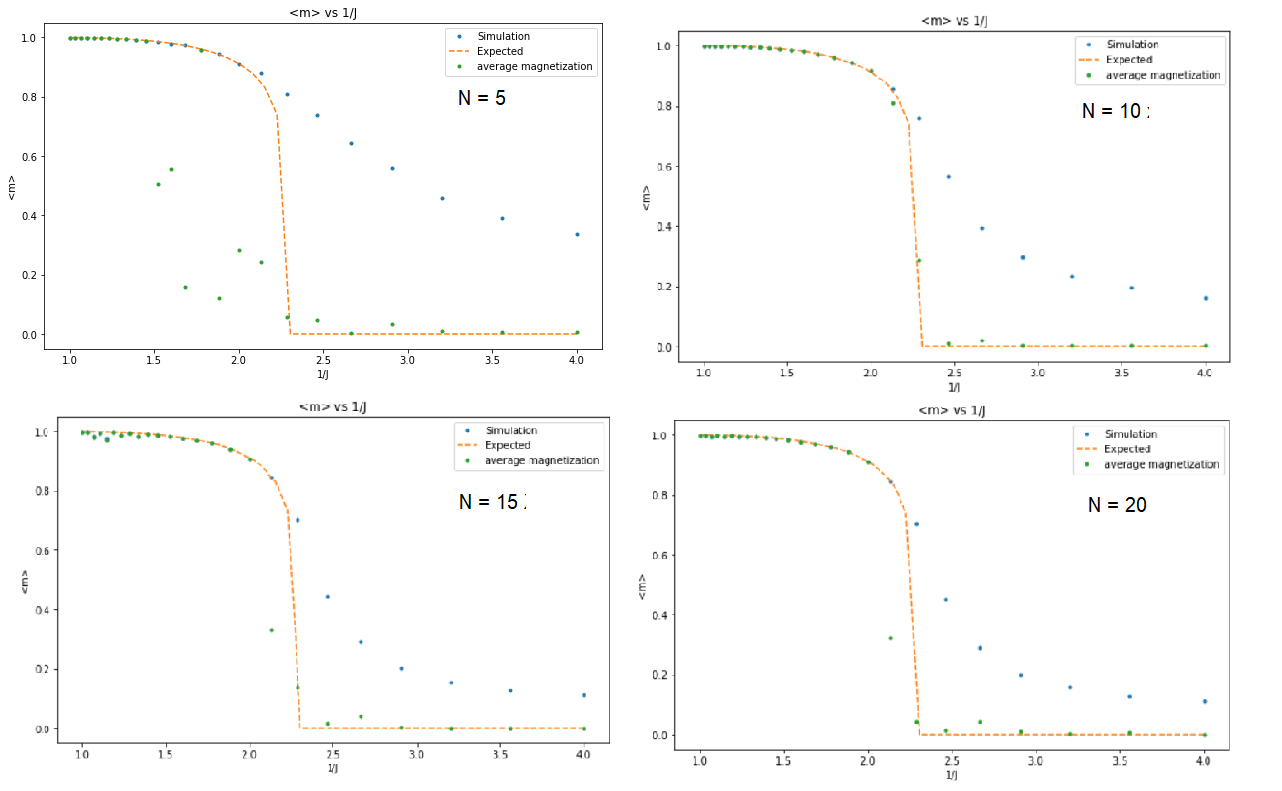

### $<m>$ vs 1/J for different N's

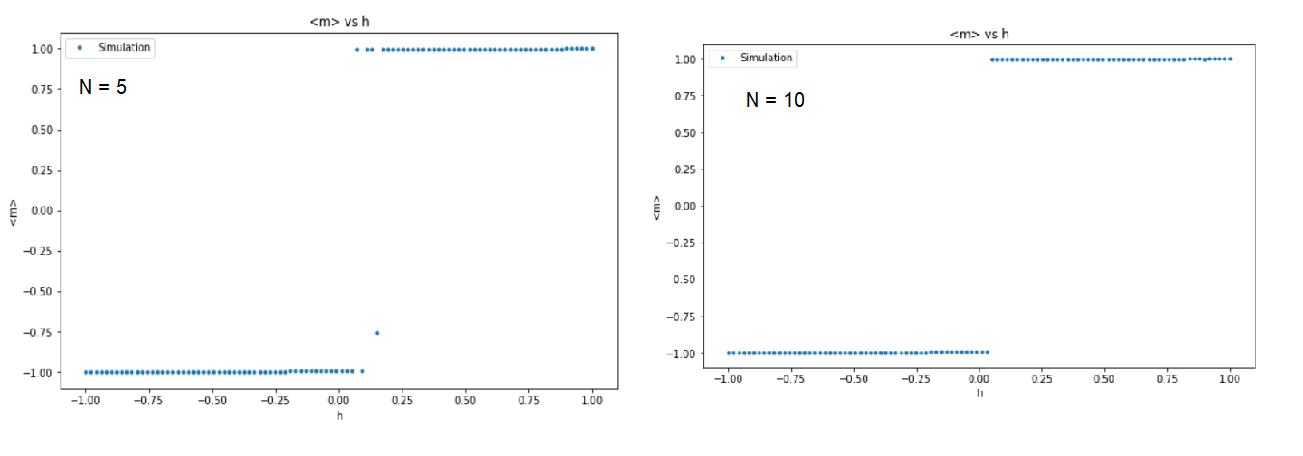

### $<e>$ vs 1/J for different N's

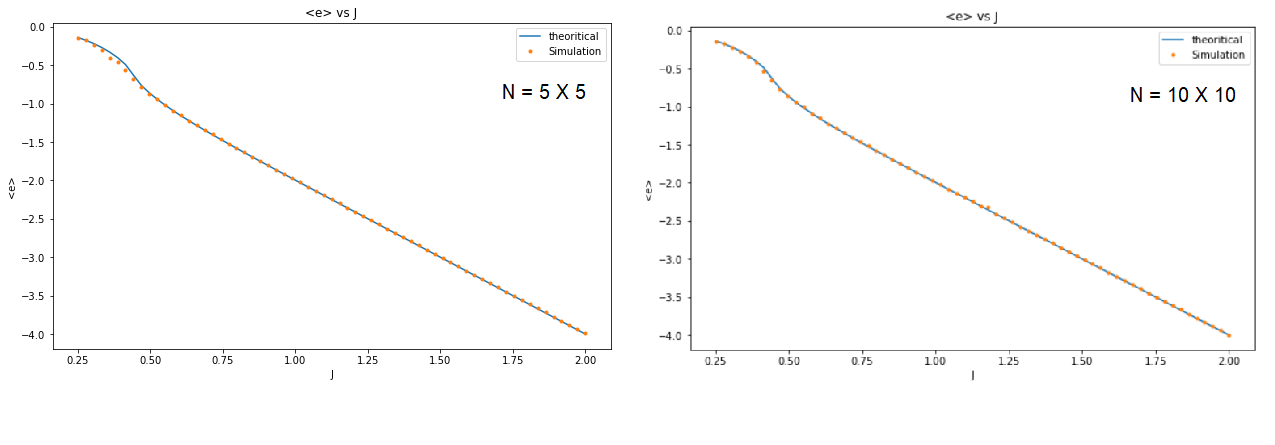